# Bird Classification with Inception V3

In [1]:
# This code is void GPU overflows
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# Folder paths
testAddress = 'test'
trainAddress = 'train'
valAddress = 'valid'
batchSize = 32

imageSize = (299, 299)

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(
        rescale=1./255)

trainSet = train_datagen.flow_from_directory(
    trainAddress,
    batch_size=batchSize,
    target_size=imageSize,
)

testSet = test_datagen.flow_from_directory(
    testAddress,
    batch_size=batchSize,
    target_size=imageSize,
)

Found 38518 images belonging to 270 classes.
Found 1350 images belonging to 270 classes.


In [4]:
# Let's import the Inception
from tensorflow.keras.applications import InceptionV3
inception = InceptionV3(input_shape=[299, 299, 3], weights='imagenet', include_top=False)

# In Order to use pre trained weights
for layer in inception.layers:
    layer.trainable = False

In [5]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
x = Flatten()(inception.output)
prediction = Dense(270, activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [7]:
# We created the model let's train
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [8]:
r = model.fit_generator(
  trainSet,
  validation_data=testSet,
  epochs=20,
  steps_per_epoch=len(trainSet),
  validation_steps=len(testSet)
)

C:\Users\bhanu\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1204/1204 [==============================] - 909s 749ms/step - loss: 25.6787 - accuracy: 0.4278 - val_loss: 6.8886 - val_accuracy: 0.8200
Epoch 2/20
1204/1204 [==============================] - 783s 650ms/step - loss: 11.0525 - accuracy: 0.7735 - val_loss: 6.3186 - val_accuracy: 0.8689
Epoch 3/20
1204/1204 [==============================] - 778s 646ms/step - loss: 8.6829 - accuracy: 0.8309 - val_loss: 4.9569 - val_accuracy: 0.8941
Epoch 4/20
1204/1204 [==============================] - 768s 638ms/step - loss: 7.6745 - accuracy: 0.8634 - val_loss: 5.1141 - val_accuracy: 0.8985
Epoch 5/20
1204/1204 [==============================] - 771s 641ms/step - loss: 6.2043 - accuracy: 0.8921 - val_loss: 8.2407 - val_accuracy: 0.8748
Epoch 6/20
1204/1204 [==============================] - 765s 635ms/step - loss: 6.4094 - accuracy: 0.8986 - val_loss: 7.0908 - val_accuracy: 0.8933
Epoch 7/20
1204/1204 [==============================] - 770s 639ms/step - loss: 5.5408 - accuracy: 0.9135 - va

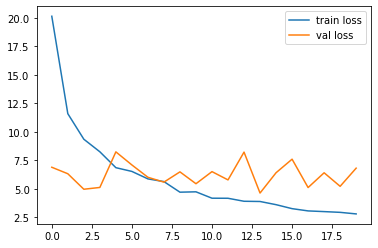

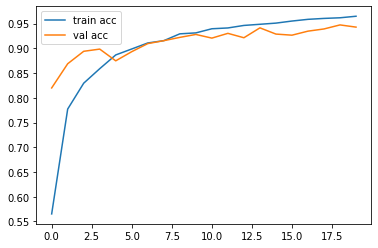

<Figure size 432x288 with 0 Axes>

In [9]:

# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Let's see the test results

In [10]:
import numpy as np
y_pred = model.predict(testSet)
y_pred = np.argmax(y_pred, axis=1) # To get the high class
y_pred

array([129,  37,  99, ...,  39, 262, 107], dtype=int64)

# save the model for future use

In [11]:
from tensorflow.keras.models import load_model

model.save('model_inceptionv3.h5')

# Let's start validation from here. We successfully completed training

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input

model_v3=load_model('model_inceptionv3.h5')


# Load and transform the image to suit the i/p format
img=image.load_img('valid/AMERICAN COOT/5.jpg',target_size=(299,299))

img=(image.img_to_array(img))/255

img=np.expand_dims(img,axis=0)
img_data=preprocess_input(img)
img_data.shape

In [ ]:
res = model_v3.predict(img_data)

In [ ]:
a=np.argmax(res, axis=1)
a

In [ ]:
# To get the generator class names
trainSet.class_indices